# Comparing large and small environmental non profits

In [1]:
# You need to run this block of code to import the libraries that are needed for the data manipulations, visualizations, etc. 

from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

## Research Question 1

In [2]:
# Read csv file into pandas dataframe

survey = pd.read_csv("SurveyDataPython.csv")
survey

Q1  \
0   The conservation foundation   
1        Sierra club foundation   
2       The wetlands initiative   
3          Living lands & water   
4      National audubon society   
5         The conservation fund   
6      National audubon society   
7       The wetlands initiative   
8          Living lands & water   
9          Living lands & water   
10         Living lands & water   
11       Sierra club foundation   
12      The wetlands initiative   
13         Living lands & water   
14     National audubon society   
15  The conservation foundation   
16         Living lands & water   
17     National audubon society   
18      The wetlands initiative   
19     National audubon society   
20  The conservation foundation   
21     National audubon society   
22      The wetlands initiative   
23  The conservation foundation   
24     National audubon society   
25       Sierra club foundation   
26     National audubon society   
27  The conservation foundation   
28       Sierra club foundation   
29     National audubon society   

                                                   Q2   Size  Count  
0   They all seem great! This one seems more local...  Small      1  
1   They have an excellent reputation and work tow...  Large      1  
2                                        To the point  Small      1  
3   Our waterways and surrounding land are vital t...  Small      1  
4   Like the focus is protecting  the natural habi...  Large      1  
5                                                 NaN  Large      1  
6                          Seemed to interest me more  Large      1  
7                          Seemed to interest me more  Small      1  
8                          Seemed to interest me more  Small      1  
9   Water is vital for everyone and it’s important...  Small      1  
10  Because I think it is important to keep our wa...  Small      1  
11                    Like its purpose and objectives  Large      1  
12  Looks like the money goes to directly support ...  Small      1  
13                                             Sharks  Small      1  
14  I really don’t know enough about any of the ab...  Large      1  
15  This is directly related to the community I re...  Small      1  
16               We need to preserve our water supply  Small      1  
17                                       I love birds  Large      1  
18  Most important for water quality. Water or lac...  Small      1  
19                                                NaN  Large      1  
20  It operates that farm which turns into a susta...  Small      1  
21  Don't think the government is involved in this...  Large      1  
22                                                NaN  Small      1  
23                Foundation implies more longer term  Small      1  
24                                       For wildlife  Large      1  
25                  Their mission is all encompassing  Large      1  
26                                                NaN  Large      1  
27  Local area, plus I believe in preserving open ...  Small      1  
28  I have heard of it, they have been around a lo...  Large      1  
29                                       I'm a birder  Large      1

In [3]:
import plotly.express as px

In [4]:
fig = px.bar(survey, x="Count", y="Size", color="Q1", title="Charity Selections")
fig.show()

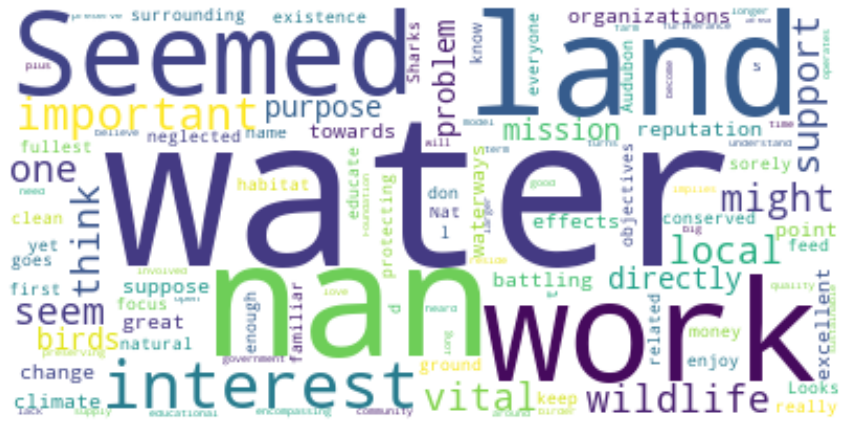

In [5]:
#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

survey['Q2'] = survey['Q2'].astype(str)

text = " ".join(i for i in survey.Q2)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
small = survey[survey['Size'] == 'Small']
small

Q1  \
0   The conservation foundation   
2       The wetlands initiative   
3          Living lands & water   
7       The wetlands initiative   
8          Living lands & water   
9          Living lands & water   
10         Living lands & water   
12      The wetlands initiative   
13         Living lands & water   
15  The conservation foundation   
16         Living lands & water   
18      The wetlands initiative   
20  The conservation foundation   
22      The wetlands initiative   
23  The conservation foundation   
27  The conservation foundation   

                                                   Q2   Size  Count  
0   They all seem great! This one seems more local...  Small      1  
2                                        To the point  Small      1  
3   Our waterways and surrounding land are vital t...  Small      1  
7                          Seemed to interest me more  Small      1  
8                          Seemed to interest me more  Small      1  
9   Water is vital for everyone and it’s important...  Small      1  
10  Because I think it is important to keep our wa...  Small      1  
12  Looks like the money goes to directly support ...  Small      1  
13                                             Sharks  Small      1  
15  This is directly related to the community I re...  Small      1  
16               We need to preserve our water supply  Small      1  
18  Most important for water quality. Water or lac...  Small      1  
20  It operates that farm which turns into a susta...  Small      1  
22                                                nan  Small      1  
23                Foundation implies more longer term  Small      1  
27  Local area, plus I believe in preserving open ...  Small      1

In [7]:
large = survey[survey['Size'] == 'Large']
large

Q1  \
1     Sierra club foundation   
4   National audubon society   
5      The conservation fund   
6   National audubon society   
11    Sierra club foundation   
14  National audubon society   
17  National audubon society   
19  National audubon society   
21  National audubon society   
24  National audubon society   
25    Sierra club foundation   
26  National audubon society   
28    Sierra club foundation   
29  National audubon society   

                                                   Q2   Size  Count  
1   They have an excellent reputation and work tow...  Large      1  
4   Like the focus is protecting  the natural habi...  Large      1  
5                                                 nan  Large      1  
6                          Seemed to interest me more  Large      1  
11                    Like its purpose and objectives  Large      1  
14  I really don’t know enough about any of the ab...  Large      1  
17                                       I love birds  Large      1  
19                                                nan  Large      1  
21  Don't think the government is involved in this...  Large      1  
24                                       For wildlife  Large      1  
25                  Their mission is all encompassing  Large      1  
26                                                nan  Large      1  
28  I have heard of it, they have been around a lo...  Large      1  
29                                       I'm a birder  Large      1

/Users/jeanetteshutay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



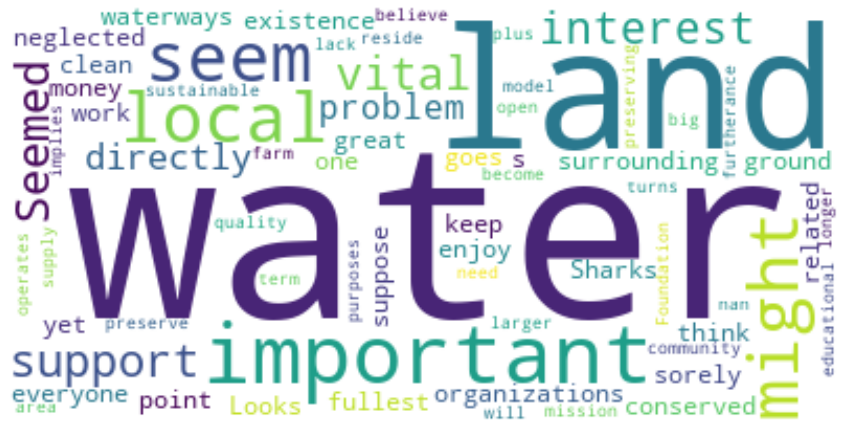

In [8]:
#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

small['Q2'] = small['Q2'].astype(str)

text = " ".join(i for i in small.Q2)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/Users/jeanetteshutay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



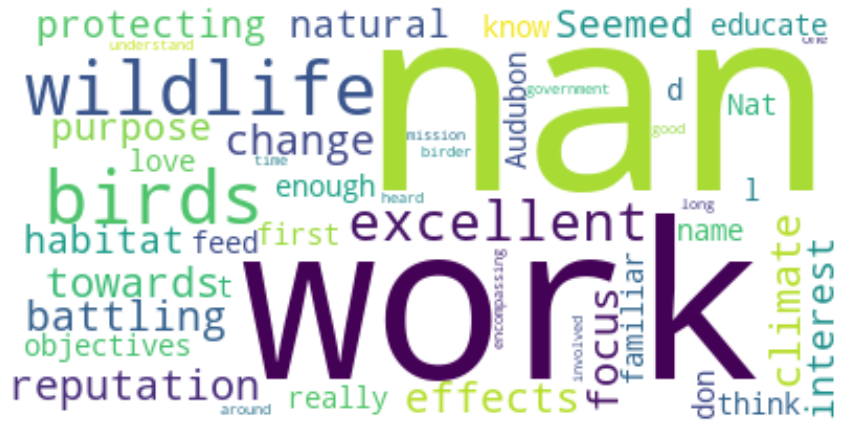

In [9]:
#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

large['Q2'] = large['Q2'].astype(str)

text = " ".join(i for i in large.Q2)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Research Question 2

### Import data, data prep, and EDA


In [10]:
# Read csv file into pandas dataframe

np = pd.read_csv("NP_dataset.csv")


In [11]:
# Examine first few cases
np

NP                                       Name   Size  Revenue  \
0    1                      The Conservation Fund  Large  $221.5M   
1    2                   National Audubon Society  Large  $157.4M   
2    3                     Sierra Club Foundation  Large  $120.5M   
3    4                    The Wetlands Initiative  Small      $2M   
4    5                The Conservation Foundation  Small    $4.1M   
5    6                       Living Lands & Water  Small    $1.7M   
6    7               Coral Restoration Foundation  Small    $3.1M   
7    8               Alliance for the Great Lakes  Small    $3.4M   
8    9                        The Alliance Center  Small   $2.72M   
9   10            Audubon of Western Pennsylvania  Small   $1.36M   
10  11                  Captain Planet Foundation  Small   $1.25M   
11  12                     The Adirondack Council  Small    $2.5M   
12  13             Alaska Conservation Foundation  Small    $3.5M   
13  14                          Wild Earth Allies  Small      $2M   
14  15                          Wildlands Network  Small    $2.1M   
15  16             New Mexico Wilderness Alliance  Small    $2.0M   
16  17        North Carolina Conservation Network  Small   $2.86M   
17  18               Environmental Defense Center  Small   $1.94M   
18  19                   The Arbor Day Foundation  Large     $84M   
19  20                   Central Park Conservancy  Large   $64.7M   
20  21                    Chicago Botanic Gardens  Large   $88.3M   
21  22  Environmental Protection and Conservation  Large  $159.5M   
22  23                               Earthjustice  Large    $150M   
23  24                 Environmental Defense Fund  Large  $185.6M   
24  25     Golden Gate National Parks Conservancy  Large   $67.5M   
25  26                  Missouri Botanical Garden  Large   $53.2M   
26  27                   National Park Foundation  Large   $70.9M   
27  28          Natural Resources Defense Council  Large  $197.6M   
28  29                     The Nature Conservancy  Large    $1.1B   
29  30                  World Resources Institute  Large  $159.3M   

                                              Mission  Environment protection  \
0   The Conservation Fund, working with public, pr...                   0.962   
1   The mission of the National Audubon Society is...                   0.768   
2   The Sierra Club Foundation promotes climate so...                   0.919   
3   The Wetlands Initiative (TWI) designs, restore...                   0.974   
4   Established in 1972 by business and community ...                   0.983   
5   Founded in 1998, Living Lands and Waters works...                   0.965   
6   Coral Restoration Foundation's core mission is...                   0.626   
7   To protect, conserve, and restore the Great La...                   0.631   
8   The Alliance Center brings people together to ...                   0.591   
9   The Audubon Society of Western Pennsylvania ha...                   0.179   
10  The Captain Planet Foundation works collaborat...                   0.961   
11  The Adirondack Council is an environmental gro...                   0.972   
12  Alaska Conservation Foundation protects the he...                   0.864   
13  Wild Earth Allies collaborates with a wide net...                   0.897   
14  Since 1991, Wildlands Network has been committ...                   0.478   
15  The New Mexico Wilderness Alliance, also known...                   0.977   
16  North Carolina Conservation Network supports, ...                   0.956   
17  The Environmental Defense Center (EDC) protect...                   0.991   
18  Founded in 1972, The Arbor Day Foundation insp...                   0.677   
19  The mission of the Central Park Conservancy is...                   0.455   
20  The mission of the Chicago Botanic Garden is "...                   0.037   
21  Conservation International (CI) applies innova...                   0.921   
2

In [12]:
# List the columns
list(np.columns)

['NP',
 'Name',
 'Size',
 'Revenue',
 'Mission',
 'Environment protection',
 'Conservation',
 'Biodiversity',
 'Environmental preservation',
 'Environmental restoration',
 'Sustainability',
 'Ecosystem services',
 'Local',
 'Global',
 'Sustainable development goals',
 'Education',
 'Activism',
 'Mean',
 'Std']

In [13]:
np.dtypes

NP                                 int64
Name                              object
Size                              object
Revenue                           object
Mission                           object
Environment protection           float64
Conservation                     float64
Biodiversity                     float64
Environmental preservation       float64
Environmental restoration        float64
Sustainability                   float64
Ecosystem services               float64
Local                            float64
Global                           float64
Sustainable development goals    float64
Education                        float64
Activism                         float64
Mean                             float64
Std                              float64
dtype: object

Minimum:0.17
Mean:0.56
Median:0.59
Mode:0.61
Maximum:0.70



/Users/jeanetteshutay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



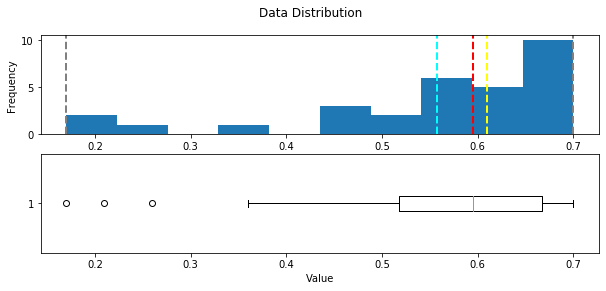

In [14]:
# Create a function that we can re-use
# This block of code will create a histogram. You don't have to use all of this code next time you want to create one
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


col = np['Mean']
# Call the function
show_distribution(col)

In [15]:
px.box(np, x="Mean", y="Revenue", orientation="h", color="Size", notched=True)

Minimum:0.15
Mean:0.26
Median:0.26
Mode:0.25
Maximum:0.42



/Users/jeanetteshutay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



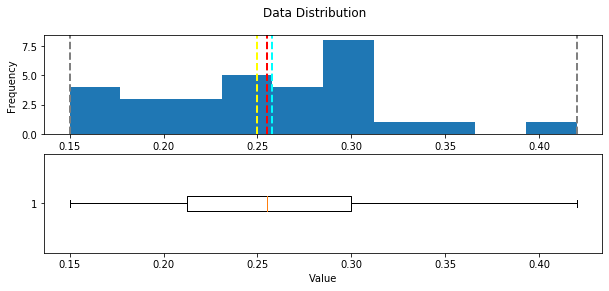

In [16]:
# Get the variable to examine
col = np['Std']
# Call the function
show_distribution(col)

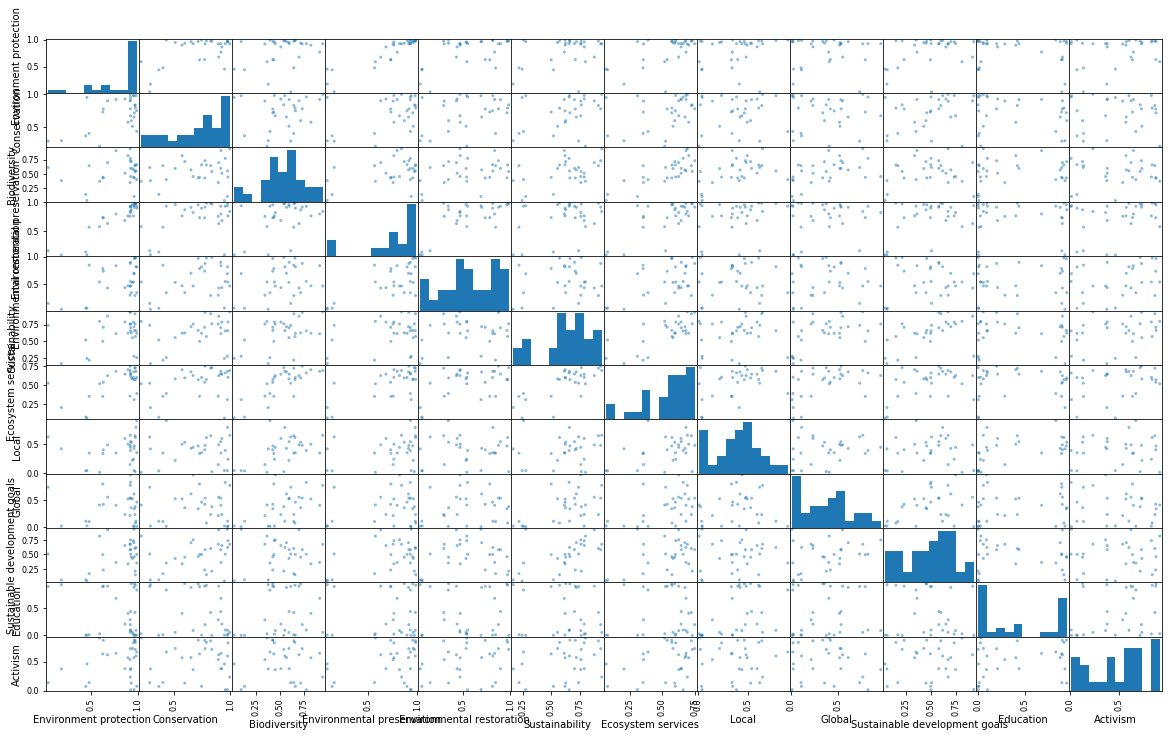

In [17]:
# Exploring relationships - this code will create scatter plots 

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
  
# selecting numerical features
features = ['Environment protection', 'Conservation', 'Biodiversity', 'Environmental preservation', 
           'Environmental restoration', 'Sustainability', 'Ecosystem services', 'Local', 'Global',
           'Sustainable development goals', 'Education', 'Activism']
   
# plotting the scatter matrix
scatter_matrix(np[features], figsize=(20,12))
plt.xticks(rotation=90)
plt.show()

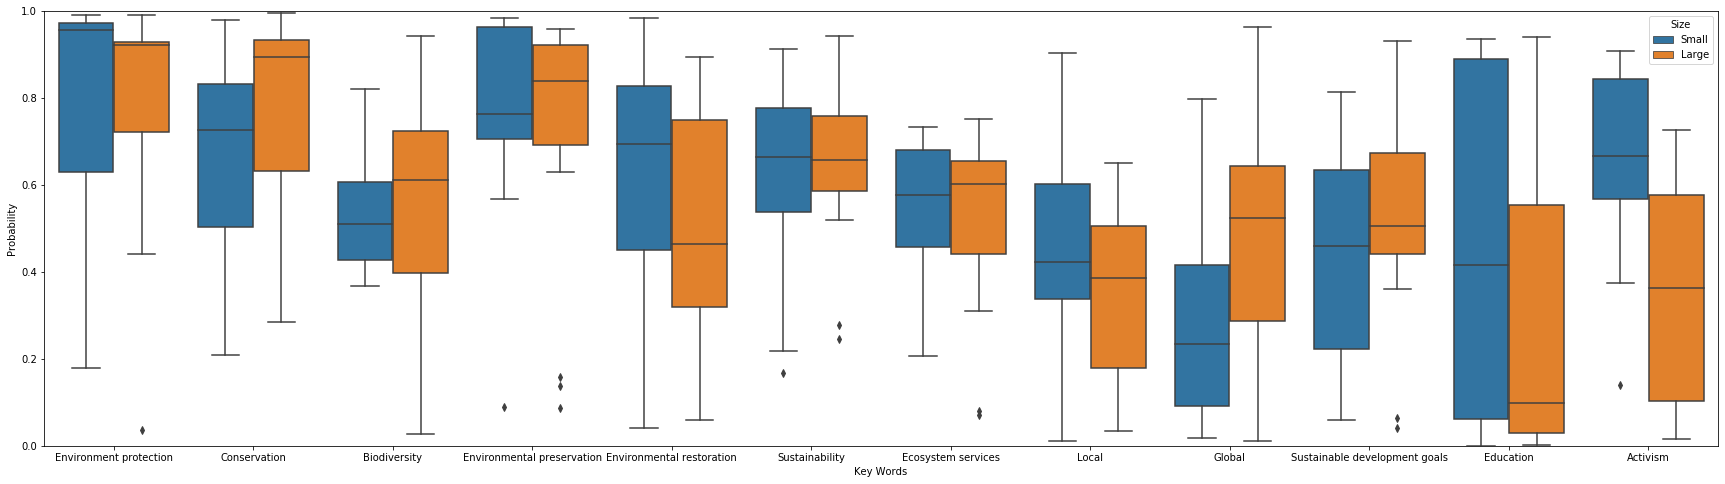

In [18]:
# If you want to compare groups based on one or more quantitative variables, use this code

col_list = ['Environment protection', 'Conservation', 'Biodiversity', 'Environmental preservation', 
           'Environmental restoration', 'Sustainability', 'Ecosystem services', 'Local', 'Global',
           'Sustainable development goals', 'Education', 'Activism', 'Size']
short_df = np[col_list]

import seaborn as sns

rs=1999
 
df_long = pd.melt(short_df.sample(30,random_state=rs), "Size", var_name="Key Words", value_name="Probability")   
f,ax = plt.subplots(figsize=(30,8))
#plt.xticks(rotation=90) 
plt.ylim(0, 1) 
#plt.xlim(0, None) 
sns.boxplot(x="Key Words", y="Probability", hue="Size", data=df_long)

In [19]:
import scipy.stats as stats
w, pvalue = stats.shapiro(np['Mean'])
w, pvalue


(0.8308805227279663, 0.00025299511617049575)

### Conducting inferential statistics

In [20]:
import scipy.stats as stats

In [21]:
# Conducting an independent samples t-test on the mean scores

stats.ttest_ind(np['Mean'][np['Size'] == 'Small'],
                np['Mean'][np['Size'] == 'Large'])

Ttest_indResult(statistic=0.6402786646773126, pvalue=0.5271967855487849)

In [22]:
# Conducting an independent samples t-test on the standard deviation of the scores

stats.ttest_ind(np['Std'][np['Size'] == 'Small'],
                np['Std'][np['Size'] == 'Large'])

Ttest_indResult(statistic=-0.23211749777235233, pvalue=0.8181349270646604)

In [23]:
#Importing the data back into Python with the spaces removed

np = pd.read_csv("NP_dataset2.csv")
np

NP                                       Name   Size  Revenue  \
0    1                      The Conservation Fund  Large  $221.5M   
1    2                   National Audubon Society  Large  $157.4M   
2    3                     Sierra Club Foundation  Large  $120.5M   
3    4                    The Wetlands Initiative  Small      $2M   
4    5                The Conservation Foundation  Small    $4.1M   
5    6                       Living Lands & Water  Small    $1.7M   
6    7               Coral Restoration Foundation  Small    $3.1M   
7    8               Alliance for the Great Lakes  Small    $3.4M   
8    9                        The Alliance Center  Small   $2.72M   
9   10            Audubon of Western Pennsylvania  Small   $1.36M   
10  11                  Captain Planet Foundation  Small   $1.25M   
11  12                     The Adirondack Council  Small    $2.5M   
12  13             Alaska Conservation Foundation  Small    $3.5M   
13  14                          Wild Earth Allies  Small      $2M   
14  15                          Wildlands Network  Small    $2.1M   
15  16             New Mexico Wilderness Alliance  Small    $2.0M   
16  17        North Carolina Conservation Network  Small   $2.86M   
17  18               Environmental Defense Center  Small   $1.94M   
18  19                   The Arbor Day Foundation  Large     $84M   
19  20                   Central Park Conservancy  Large   $64.7M   
20  21                    Chicago Botanic Gardens  Large   $88.3M   
21  22  Environmental Protection and Conservation  Large  $159.5M   
22  23                               Earthjustice  Large    $150M   
23  24                 Environmental Defense Fund  Large  $185.6M   
24  25     Golden Gate National Parks Conservancy  Large   $67.5M   
25  26                  Missouri Botanical Garden  Large   $53.2M   
26  27                   National Park Foundation  Large   $70.9M   
27  28          Natural Resources Defense Council  Large  $197.6M   
28  29                     The Nature Conservancy  Large    $1.1B   
29  30                  World Resources Institute  Large  $159.3M   

                                              Mission  EnvironmentProtection  \
0   The Conservation Fund, working with public, pr...                  0.962   
1   The mission of the National Audubon Society is...                  0.768   
2   The Sierra Club Foundation promotes climate so...                  0.919   
3   The Wetlands Initiative (TWI) designs, restore...                  0.974   
4   Established in 1972 by business and community ...                  0.983   
5   Founded in 1998, Living Lands and Waters works...                  0.965   
6   Coral Restoration Foundation's core mission is...                  0.626   
7   To protect, conserve, and restore the Great La...                  0.631   
8   The Alliance Center brings people together to ...                  0.591   
9   The Audubon Society of Western Pennsylvania ha...                  0.179   
10  The Captain Planet Foundation works collaborat...                  0.961   
11  The Adirondack Council is an environmental gro...                  0.972   
12  Alaska Conservation Foundation protects the he...                  0.864   
13  Wild Earth Allies collaborates with a wide net...                  0.897   
14  Since 1991, Wildlands Network has been committ...                  0.478   
15  The New Mexico Wilderness Alliance, also known...                  0.977   
16  North Carolina Conservation Network supports, ...                  0.956   
17  The Environmental Defense Center (EDC) protect...                  0.991   
18  Founded in 1972, The Arbor Day Foundation insp...                  0.677   
19  The mission of the Central Park Conservancy is...                  0.455   
20  The mission of the Chicago Botanic Garden is "...                  0.037   
21  Conservation International (CI) applies innova...                  0.921   
22  Founded in 1971, Ear

In [24]:
# Conducting a MANOVA

from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('EnvironmentProtection + Conservation + Biodiversity + EnvironmentalPreservation + EnvironmentalRestoration + Sustainability + EcosystemServices + Local + Global + SDG + Education + Activism ~ Size', data=np)
print(fit.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value   Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0629 12.0000 17.0000 21.1149 0.0000
         Pillai's trace  0.9371 12.0000 17.0000 21.1149 0.0000
 Hotelling-Lawley trace 14.9046 12.0000 17.0000 21.1149 0.0000
    Roy's greatest root 14.9046 12.0000 17.0000 21.1149 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           Size          Value   Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.4350 12.0000 17.0000  1.8404 0.1217
          Pillai's trace 0.5650 12.0000 17.0000  1.8404 0.1217
  Hotelling

### Distributions are not normal, consider doing separate Mann Whitney U tests

In [25]:
small = np[np['Size'] == 'Small']
small

NP                                 Name   Size Revenue  \
3    4              The Wetlands Initiative  Small     $2M   
4    5          The Conservation Foundation  Small   $4.1M   
5    6                 Living Lands & Water  Small   $1.7M   
6    7         Coral Restoration Foundation  Small   $3.1M   
7    8         Alliance for the Great Lakes  Small   $3.4M   
8    9                  The Alliance Center  Small  $2.72M   
9   10      Audubon of Western Pennsylvania  Small  $1.36M   
10  11            Captain Planet Foundation  Small  $1.25M   
11  12               The Adirondack Council  Small   $2.5M   
12  13       Alaska Conservation Foundation  Small   $3.5M   
13  14                    Wild Earth Allies  Small     $2M   
14  15                    Wildlands Network  Small   $2.1M   
15  16       New Mexico Wilderness Alliance  Small   $2.0M   
16  17  North Carolina Conservation Network  Small  $2.86M   
17  18         Environmental Defense Center  Small  $1.94M   

                                              Mission  EnvironmentProtection  \
3   The Wetlands Initiative (TWI) designs, restore...                  0.974   
4   Established in 1972 by business and community ...                  0.983   
5   Founded in 1998, Living Lands and Waters works...                  0.965   
6   Coral Restoration Foundation's core mission is...                  0.626   
7   To protect, conserve, and restore the Great La...                  0.631   
8   The Alliance Center brings people together to ...                  0.591   
9   The Audubon Society of Western Pennsylvania ha...                  0.179   
10  The Captain Planet Foundation works collaborat...                  0.961   
11  The Adirondack Council is an environmental gro...                  0.972   
12  Alaska Conservation Foundation protects the he...                  0.864   
13  Wild Earth Allies collaborates with a wide net...                  0.897   
14  Since 1991, Wildlands Network has been committ...                  0.478   
15  The New Mexico Wilderness Alliance, also known...                  0.977   
16  North Carolina Conservation Network supports, ...                  0.956   
17  The Environmental Defense Center (EDC) protect...                  0.991   

    Conservation  Biodiversity  EnvironmentalPreservation  \
3          0.836         0.540                      0.970   
4          0.976         0.551                      0.979   
5          0.715         0.427                      0.954   
6          0.727         0.437                      0.733   
7          0.773         0.426                      0.730   
8          0.209         0.367                      0.576   
9          0.291         0.379                      0.089   
10         0.651         0.568                      0.911   
11         0.826         0.644                      0.981   
12         0.925         0.510                      0.683   
13         0.572         0.821                      0.763   
14         0.402         0.643                      0.567   
15         0.788         0.656                      0.984   
16         0.979         0.443                      0.763   
17         0.432         0.397                      0.930   

    EnvironmentalRestoration  Sustainability  EcosystemServices  Local  \
3                      0.983           0.763              0.732  0.022   
4                      0.814           0.660              0.683  0.785   
5                      0.964           0.664              0.574  0.466   
6                      0.781           0.500              0.355  0.335   
7                      0.733           0.711              0.539  0.399   
8                      0.537           0.800              0.520  0.010   
9                      0.041           0.168              0.207  0.415   
10                     0.695           0.720              0.676  0.423   
11                     0.291           0.913              0.725  0.642   
12           

In [26]:
large = np[np['Size'] == 'Large']
large

NP                                       Name   Size  Revenue  \
0    1                      The Conservation Fund  Large  $221.5M   
1    2                   National Audubon Society  Large  $157.4M   
2    3                     Sierra Club Foundation  Large  $120.5M   
18  19                   The Arbor Day Foundation  Large     $84M   
19  20                   Central Park Conservancy  Large   $64.7M   
20  21                    Chicago Botanic Gardens  Large   $88.3M   
21  22  Environmental Protection and Conservation  Large  $159.5M   
22  23                               Earthjustice  Large    $150M   
23  24                 Environmental Defense Fund  Large  $185.6M   
24  25     Golden Gate National Parks Conservancy  Large   $67.5M   
25  26                  Missouri Botanical Garden  Large   $53.2M   
26  27                   National Park Foundation  Large   $70.9M   
27  28          Natural Resources Defense Council  Large  $197.6M   
28  29                     The Nature Conservancy  Large    $1.1B   
29  30                  World Resources Institute  Large  $159.3M   

                                              Mission  EnvironmentProtection  \
0   The Conservation Fund, working with public, pr...                  0.962   
1   The mission of the National Audubon Society is...                  0.768   
2   The Sierra Club Foundation promotes climate so...                  0.919   
18  Founded in 1972, The Arbor Day Foundation insp...                  0.677   
19  The mission of the Central Park Conservancy is...                  0.455   
20  The mission of the Chicago Botanic Garden is "...                  0.037   
21  Conservation International (CI) applies innova...                  0.921   
22  Founded in 1971, Earthjustice fights to preser...                  0.945   
23  What distinguishes EDF from others is the comb...                  0.991   
24  The Golden Gate National Parks Conservancy is ...                  0.925   
25  Founded in 1859, the Missouri Botanical Garden...                  0.932   
26  As the official non-profit partner of the Nati...                  0.442   
27  The Natural Resources Defense Council's (NRDC)...                  0.921   
28  The Nature Conservancy is a leading conservati...                  0.924   
29  Founded in 1982, World Resources Institute (WR...                  0.924   

    Conservation  Biodiversity  EnvironmentalPreservation  \
0          0.974         0.099                      0.938   
1          0.917         0.911                      0.796   
2          0.893         0.345                      0.755   
18         0.897         0.698                      0.630   
19         0.948         0.027                      0.088   
20         0.285         0.612                      0.159   
21         0.995         0.943                      0.840   
22         0.511         0.593                      0.959   
23         0.745         0.660                      0.896   
24         0.915         0.596                      0.930   
25         0.596         0.715                      0.868   
26         0.366         0.134                      0.138   
27         0.776         0.731                      0.914   
28         0.955         0.773                      0.929   
29         0.670         0.452                      0.820   

    EnvironmentalRestoration  Sustainability  EcosystemServices  Local  \
0                      0.688           0.278              0.311  0.039   
1                      0.833           0.615              0.684  0.344   
2                      0.297           0.760              0.357  0.144   
18                     0.427           0.877              0.627  0.484   
19                     0.062           0.246              0.070  0.040   
20                     0.147           0.740              0.527  0.621   
21                     0.464           0.942              0.694  0.650   
22                     0.529           0.556     

In [27]:
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=small['EnvironmentProtection'], y=large['EnvironmentProtection'], alternative = 'two-sided')

MannwhitneyuResult(statistic=133.5, pvalue=0.39500032460202306)

In [28]:
stats.mannwhitneyu(x=small['Conservation'], y=large['Conservation'], alternative = 'two-sided')

MannwhitneyuResult(statistic=88.0, pvalue=0.3195059648919748)

In [29]:
stats.mannwhitneyu(x=small['Biodiversity'], y=large['Biodiversity'], alternative = 'two-sided')

MannwhitneyuResult(statistic=85.0, pvalue=0.26275304114766074)

In [30]:
stats.mannwhitneyu(x=small['EnvironmentalPreservation'], y=large['EnvironmentalPreservation'], alternative = 'two-sided')

MannwhitneyuResult(statistic=125.5, pvalue=0.6040458254801915)

In [31]:
stats.mannwhitneyu(x=small['EnvironmentalRestoration'], y=large['EnvironmentalRestoration'], alternative = 'two-sided')

MannwhitneyuResult(statistic=142.0, pvalue=0.22897717637243797)

In [32]:
stats.mannwhitneyu(x=small['Sustainability'], y=large['Sustainability'], alternative = 'two-sided')

MannwhitneyuResult(statistic=108.0, pvalue=0.8682114641097)

In [33]:
stats.mannwhitneyu(x=small['EcosystemServices'], y=large['EcosystemServices'], alternative = 'two-sided')

MannwhitneyuResult(statistic=115.0, pvalue=0.9338864180775845)

In [34]:
stats.mannwhitneyu(x=small['Local'], y=large['Local'], alternative = 'two-sided')

MannwhitneyuResult(statistic=129.0, pvalue=0.506914933812496)

In [35]:
stats.mannwhitneyu(x=small['Global'], y=large['Global'], alternative = 'two-sided')

MannwhitneyuResult(statistic=70.0, pvalue=0.08149464839345506)

In [36]:
stats.mannwhitneyu(x=small['SDG'], y=large['SDG'], alternative = 'two-sided')

MannwhitneyuResult(statistic=90.0, pvalue=0.36144295171671303)

In [37]:
stats.mannwhitneyu(x=small['Education'], y=large['Education'], alternative = 'two-sided')

MannwhitneyuResult(statistic=139.0, pvalue=0.2807349707913387)

In [38]:
stats.mannwhitneyu(x=small['Activism'], y=large['Activism'], alternative = 'two-sided')

MannwhitneyuResult(statistic=183.5, pvalue=0.0034497781601797927)